In [2]:
import numpy as np
import math
from matplotlib import pyplot
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Polygon, LinearRing
from sklearn.cluster import KMeans

def coord_extend(coords, feet_expand):
    
    def latConvert(n):
        degrees = n/305775
        return degrees
    
    def coordinate_get(x):
        return [(i[0], i[1]) for i in x]

    get = coordinate_get(coords)
    
    feet_expand = latConvert(feet_expand)

    obj = LinearRing(coords)

    """----------- new code for a new offset--------"""
    offset_1 = obj.parallel_offset(feet_expand, 'left', join_style=3, mitre_limit=10.0)
    offset_2 = obj.parallel_offset(feet_expand, 'right', join_style=3, mitre_limit=10.0)
    
    if offset_1.length > offset_2.length:
        orient = 'left'
    else:
        orient = 'right'
        
    """---------------------"""
    
    
    offset = obj.parallel_offset(feet_expand, orient, join_style=3, mitre_limit=10)

#     offset = offset.simplify(0.5, preserve_topology=False)
    
    new_coords = list(offset.coords)
    
    def coordinate_give(x):
        return [[i[0], i[1]] for i in x]
    
    give = coordinate_give(new_coords)
    
#     return(offset)
    return(give)

In [6]:
import json

json_data = open('100zones.json').read()

zones = json.loads(json_data)

# zones

for x in (range(0, len(zones['data']))):
    print("ZONE #", x+1, "--- Name : ", zones['data'][x]['name'])
    coords = zones['data'][x]['geojson']['geometry']['coordinates'][0]
    print("Number of original Coordinates for shape : ", len(coords))
    print("After extension extension : ", len(coord_extend(coords, 35)), "\n")


ZONE # 1 --- Name :  SPRH:127
Number of original Coordinates for shape :  5
After extension extension :  8 

ZONE # 2 --- Name :  EALC:102
Number of original Coordinates for shape :  7
After extension extension :  8 

ZONE # 3 --- Name :  EALC:100
Number of original Coordinates for shape :  7
After extension extension :  8 

ZONE # 4 --- Name :  EALC:106
Number of original Coordinates for shape :  7
After extension extension :  8 

ZONE # 5 --- Name :  MCIN:324
Number of original Coordinates for shape :  5
After extension extension :  8 

ZONE # 6 --- Name :  GYMN:100
Number of original Coordinates for shape :  5
After extension extension :  8 

ZONE # 7 --- Name :  EALC:225
Number of original Coordinates for shape :  6
After extension extension :  8 

ZONE # 8 --- Name :  WORK:202
Number of original Coordinates for shape :  6
After extension extension :  8 

ZONE # 9 --- Name :   EALC:223
Number of original Coordinates for shape :  6
After extension extension :  8 

ZONE # 10 --- Name

After extension extension :  22 

ZONE # 122 --- Name :  MCIN:328
Number of original Coordinates for shape :  5
After extension extension :  8 

ZONE # 123 --- Name :  Eagle Learning Center
Number of original Coordinates for shape :  11
After extension extension :  12 

ZONE # 124 --- Name :  EALC:221
Number of original Coordinates for shape :  6
After extension extension :  8 

ZONE # 125 --- Name :  EALC:203
Number of original Coordinates for shape :  6
After extension extension :  8 

ZONE # 126 --- Name :  Gymnasium
Number of original Coordinates for shape :  17
After extension extension :  20 

ZONE # 127 --- Name :  Walton Hall 
Number of original Coordinates for shape :  26
After extension extension :  30 

ZONE # 128 --- Name :  WORK:001
Number of original Coordinates for shape :  5
After extension extension :  8 

ZONE # 129 --- Name :  MCIN:107
Number of original Coordinates for shape :  5
After extension extension :  8 

ZONE # 130 --- Name :  EALC:205
Number of original Coo

# Plot Original and expanded Coordinates

In [88]:
def plot_coords(ax, x, y, color='#999999', zorder=1):
    ax.plot(x, y, 'o', color=color, zorder=zorder)

def plot_line(ax, ob,):
    parts = hasattr(ob, 'geoms') and ob or [ob]
    for part in parts:
        x, y = part.xy
        ax.plot(x, y, linewidth=1, solid_capstyle='round', zorder=1)

def set_limits(ax, x_range, y_range):
    ax.set_xlim(*x_range)
    ax.set_ylim(*y_range)
    ax.set_aspect(1)

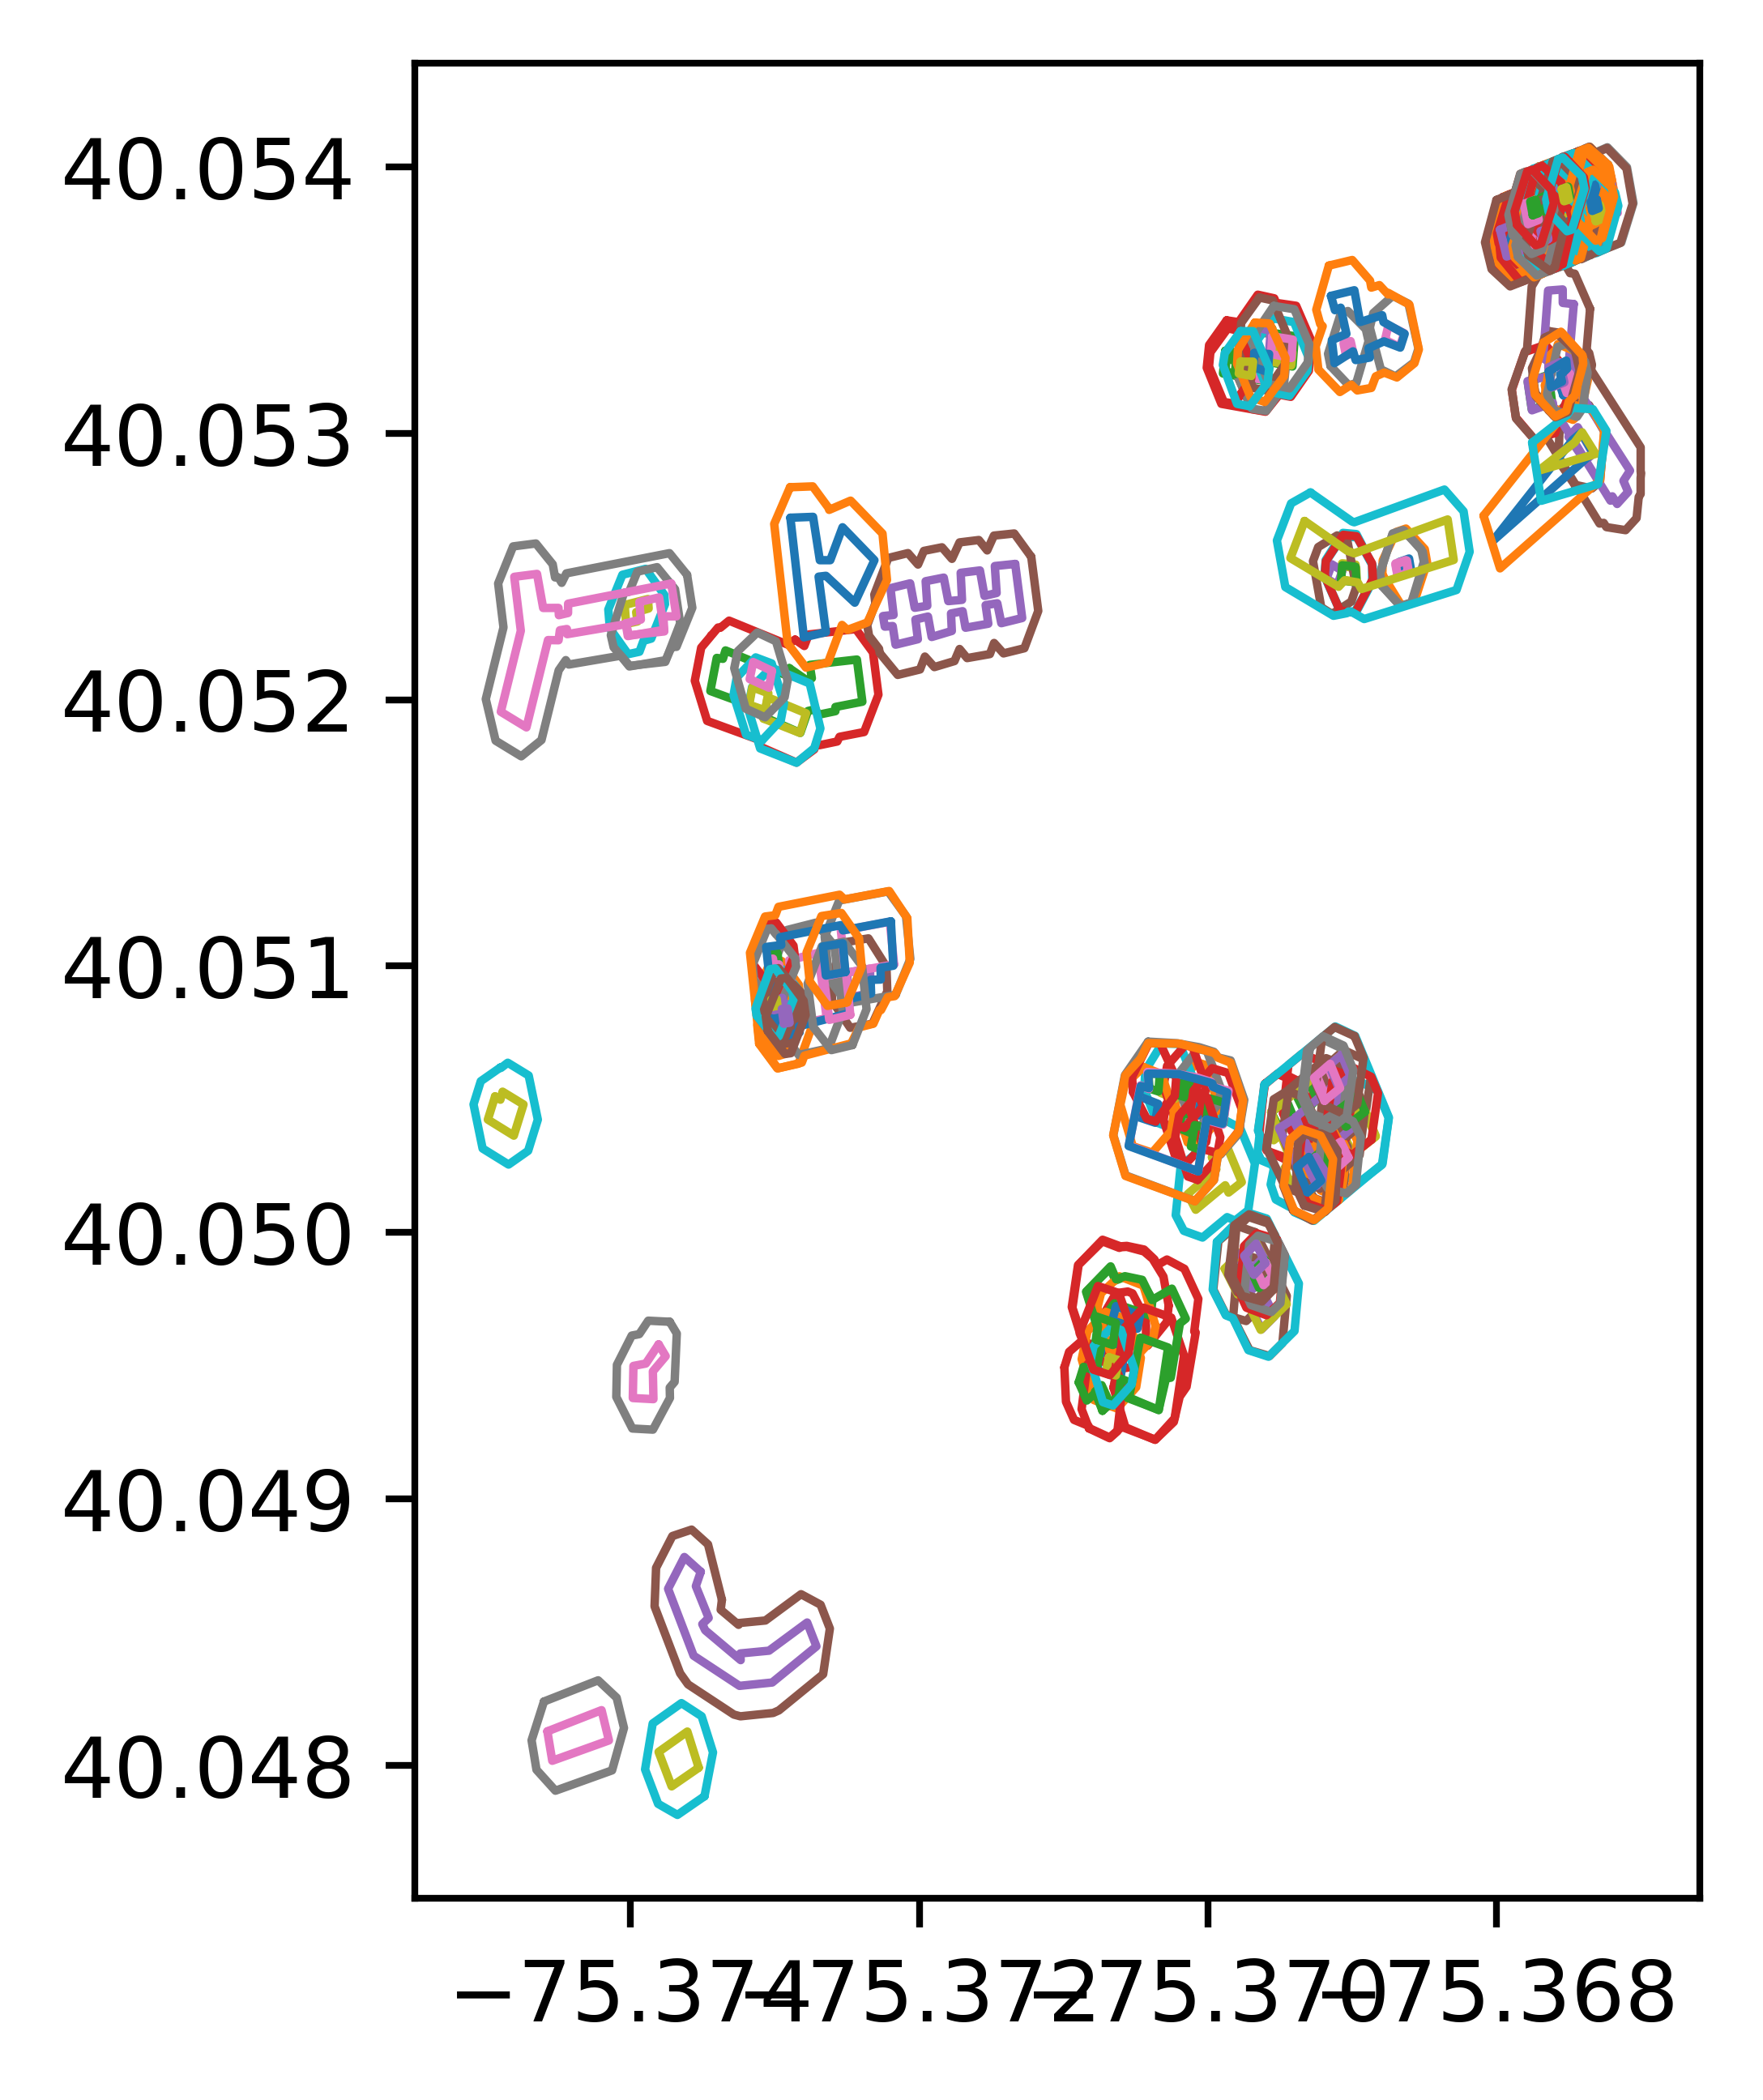

In [89]:
fig = pyplot.figure(1, dpi=750)
ax = fig.add_subplot(122)

for x in (range(0, len(zones['data']))):
    coords = zones['data'][x]['geojson']['geometry']['coordinates'][0]

    expanded = coord_extend(coords, 35)

    coords = LinearRing(coords)

    expanded = LinearRing(expanded)
    
    plot_line(ax, coords)
    
    plot_line(ax, expanded)



In [ ]:
from utils import coord_extend

coordinates = [[-75.37304444964997, 40.05104479322094],
                   [-75.37298332826832, 40.05104911199197],
                   [-75.37297486530541, 40.05101456183593], 
                   [-75.37300213484826, 40.05101456183593],
                   [-75.37300589616947, 40.05103399631204], 
                   [-75.37304162866229, 40.05102895773143],
                   [-75.37304444964997, 40.05104479322094]]

wtf = coord_extend(coordinates, 64)